In [29]:
import random
import time
import matplotlib.pyplot as plt

In [30]:
def bubble_sort(arr):
    length = len(arr)
    for x in range(length):
        for y in range(0, length - x - 1):
            if arr[y] > arr[y+1]:
                arr[y], arr[y+1] = arr[y+1], arr[y]

In [31]:
def selection_sort(arr):
    n = len(arr)
    for x in range(n - 1):
        min_index = x
        for y in range(x+1, n):
            if arr[y] < arr[min_index]:
                min_index = y
        arr[x], arr[min_index] = arr[min_index], arr[x]

In [32]:
def insertion_sort(arr):
    for x in range(1, len(arr)):
        key = arr[x]
        y = x - 1

        while y >= 0 and key < arr[y]:
            arr[y+1] = arr[y]
            y -= 1
        arr[y+1] = key

In [33]:
def time_algorithm(func, arr, repeats=5):
    total = 0
    for _ in range(repeats):
        copy = arr.copy()
        start = time.perf_counter()
        func(copy)
        total += time.perf_counter() - start
    return total / repeats

In [34]:
def run_algorithms(lists, order_type):
    results = {"Bubble Sort": [], "Selection Sort": [], "Insertion Sort": []}

    for size in lists:
        if order_type.lower() == "sorted":
            base_array = list(range(size))
        elif order_type.lower() == "reverse sorted":
            base_array = list(range(size - 1, -1, -1))
        else:
            base_array = list(range(size))
            random.shuffle(base_array)

        results["Bubble Sort"].append(time_algorithm(bubble_sort, base_array.copy()))
        results["Selection Sort"].append(time_algorithm(selection_sort, base_array.copy()))
        results["Insertion Sort"].append(time_algorithm(insertion_sort, base_array.copy()))

    return results

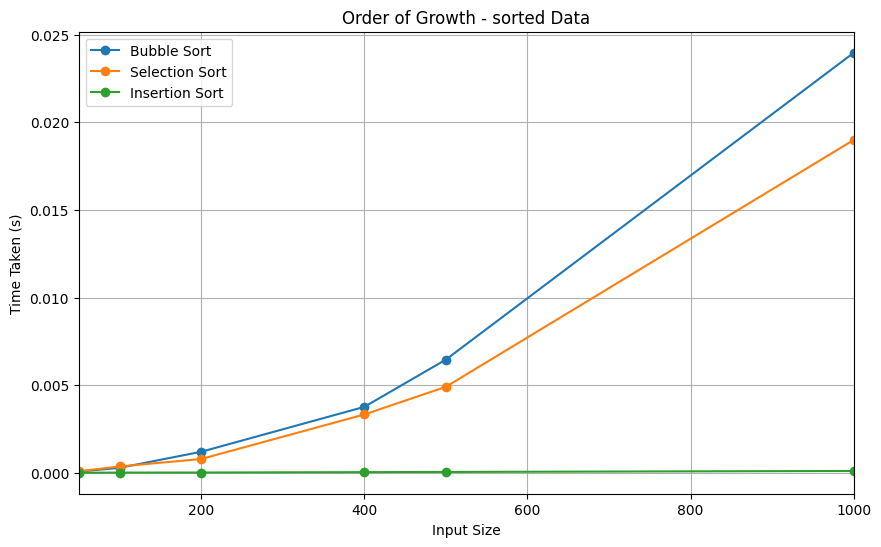

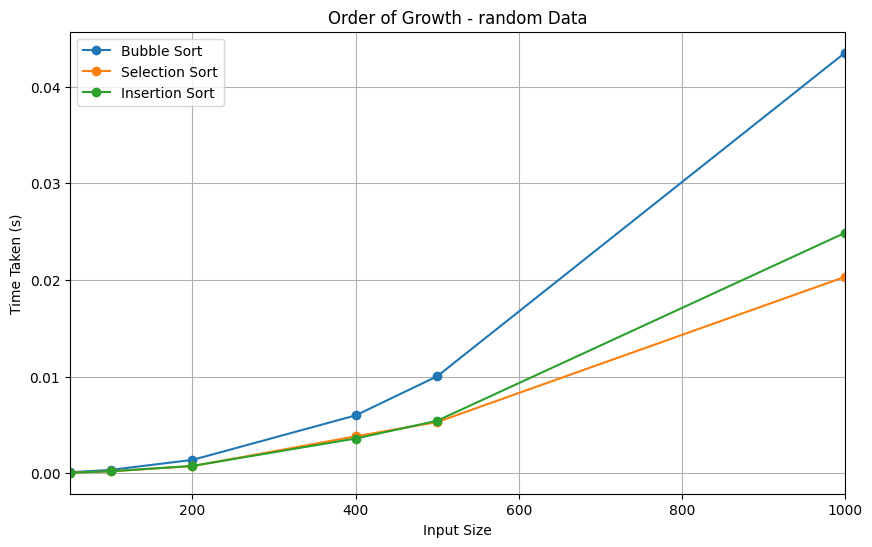

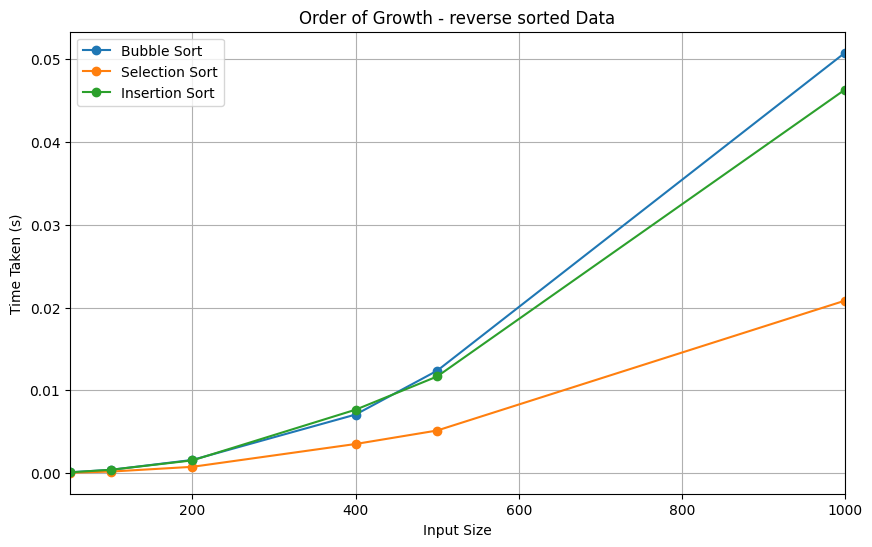

In [35]:
sizes = [50, 100, 200, 400, 500, 1000]
order_types = ["sorted", "random", "reverse sorted"]

for order in order_types:
    results = run_algorithms(sizes, order)
    plt.figure(figsize=(10,6))
    for algorithm in results:
        plt.plot(sizes, results[algorithm], marker='o', label=algorithm)
    plt.title(f"Order of Growth - {order} Data")
    plt.xlabel("Input Size")
    plt.ylabel("Time Taken (s)")
    plt.xlim(50, 1000)
    plt.legend()
    plt.grid(True)
    plt.show()